<h1>Pequeño agente para recordatorio de envío de facturas</h1>

In [ ]:
#acá tendrían los datos verdaderos de los clientes
clientes = [
    {"nombre": "Carlos López", "email": "carlos@example.com", "telefono": "+595981111111"},
    {"nombre": "Ana Rojas", "email": "ana@example.com", "telefono": "+595982222222"},
    {"nombre": "Luis Duarte", "email": "luis@example.com", "telefono": "+595983333333"},
]


In [ ]:
#definen el mensaje que se enviará a los clientes
#en este caso, es un recordatorio para que envíen sus facturas
def generar_mensaje(nombre):
    return f"Estimado {nombre}, no olvides enviarme tus facturas antes de que termine el mes. Si ya lo hiciste, ignora este mensaje. ¡Saludos!"

<h3>Envío del correo</h3>

In [ ]:
#acá con programación establecemos la función para el envío del mail
import smtplib
from email.message import EmailMessage

def enviar_email(destinatario, asunto, cuerpo):
    remitente = "tucorreo@gmail.com"
    password = "tu_contraseña_app"  #

    msg = EmailMessage()
    msg.set_content(cuerpo)
    msg["Subject"] = asunto
    msg["From"] = remitente
    msg["To"] = destinatario

    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
        smtp.login(remitente, password)
        smtp.send_message(msg)


<h3>Envío de recordatorios al whatsapp desde twilio</h3>

In [ ]:
#aquí vamos a definir la función para enviar el mensaje por WhatsApp
from twilio.rest import Client

def enviar_whatsapp(telefono, mensaje):
    account_sid = "tu_account_sid"
    auth_token = "tu_auth_token"
    client = Client(account_sid, auth_token)

    message = client.messages.create(
        from_='whatsapp:+14155238886',
        body=mensaje,
        to=f'whatsapp:{telefono}'
    )


<h3>Automatización de ejecución del agente</h3>

In [ ]:
#este fragmento hace que el agente se ejecute automáticamente el día 28 de cada mes
from datetime import datetime

def ejecutar_agente():
    hoy = datetime.now()
    if hoy.day == 28:
        for cliente in clientes:
            mensaje = generar_mensaje(cliente["nombre"])
            enviar_email(cliente["email"], "Recordatorio de facturas", mensaje)
            enviar_whatsapp(cliente["telefono"], mensaje)

ejecutar_agente()


<h1>Prompts para realizar series temporales, modelos de regresión y clasificación</h1>

<h3>Series Temporales: Predicción de inflación mensual en Paraguay</h3>

C:\Users\EVELYN\AppData\Local\Temp\ipykernel_4784\1963038155.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start="2020-01-01", periods=60, freq="M")
C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\

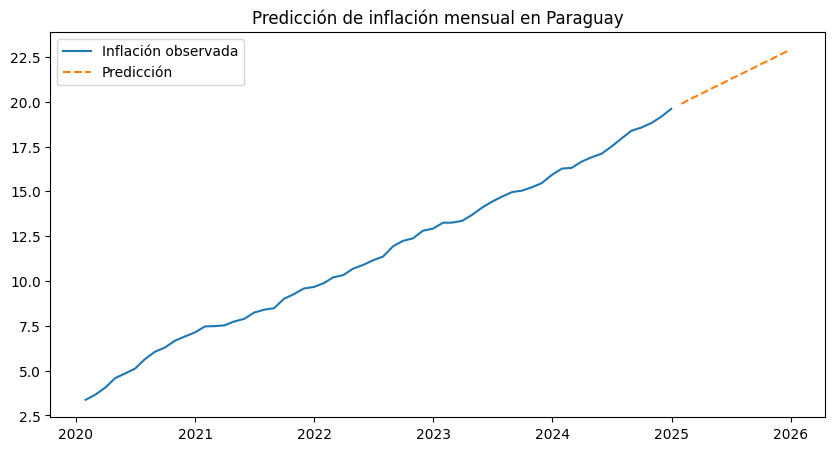

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# simulamos datos de inflación mensual (2020–2024)
np.random.seed(42)
fechas = pd.date_range(start="2020-01-01", periods=60, freq="M")
inflacion = np.cumsum(np.random.normal(loc=0.3, scale=0.15, size=60)) + 3

df = pd.DataFrame({"fecha": fechas, "inflacion": inflacion}).set_index("fecha")

# Utililzamos el modelo ARIMA para la predicción de la inflación    
modelo = ARIMA(df, order=(1,1,1))
resultado = modelo.fit()
pred = resultado.forecast(steps=12)

# Visualizamos gráficamente la inflación observada y la predicción del modelo
plt.figure(figsize=(10, 5))
plt.plot(df, label="Inflación observada")
plt.plot(pred, label="Predicción", linestyle="--")
plt.title("Predicción de inflación mensual en Paraguay")
plt.legend()
plt.show()


<h3>Clasificación: Riesgo de mora en préstamos personales</h3>

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Aquí generamos un dataset falso 
X, y = make_classification(n_samples=10, n_features=5, 
                           n_informative=4, n_redundant=0, n_classes=2,
                           weights=[0.7, 0.3], random_state=42)

clientes = pd.DataFrame(X, columns=["Edad", "Ingreso mensual", "Monto préstamo", "Atrasos pasados", "Región (codificada)"])
clientes["Nombre"] = [
    "Ana Rojas", "Carlos López", "Luis Duarte", "Marta Acosta", "Pedro González",
    "Sofía Caballero", "Julio Vera", "Valentina Gómez", "José Ayala", "Laura Benítez"
]
clientes["Riesgo_de_mora (real)"] = y

# Realizamos la división de los datos
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, clientes.index, test_size=0.3, random_state=0
)

# Entrenamos nuestro modelo
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Añadimos la predicción al subset real de clientes
clientes_test = clientes.iloc[idx_test].copy()
clientes_test["Riesgo_predicho"] = y_pred


print(clientes_test[["Nombre", "Edad", "Ingreso mensual", "Monto préstamo", "Atrasos pasados", "Región (codificada)", "Riesgo_de_mora (real)", "Riesgo_predicho"]])
print("\nReporte de riesgo de mora (evaluación):")
print(classification_report(y_test, y_pred))


           Nombre      Edad  Ingreso mensual  Monto préstamo  Atrasos pasados  \
2     Luis Duarte -0.758490        -1.706596       -0.153336         1.117372   
8      José Ayala -0.522425        -0.947309       -0.906987        -1.905826   
4  Pedro González -2.060529        -0.602945        1.945116        -1.831052   

   Región (codificada)  Riesgo_de_mora (real)  Riesgo_predicho  
2            -1.685645                      0                0  
8             1.740550                      1                0  
4            -0.509678                      0                0  

Reporte de riesgo de mora (evaluación):
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\EVELYN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

<h3> Regresión: Predicción del ingreso mensual según edad, nivel educativo, sector</h3>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creamos los datos ficticios   
np.random.seed(0)
n = 20
nombres = [
    "Ana Rojas", "Carlos López", "Luis Duarte", "Marta Acosta", "Pedro González",
    "Sofía Caballero", "Julio Vera", "Valentina Gómez", "José Ayala", "Laura Benítez",
    "Elena Ramírez", "Fernando Díaz", "María Franco", "Jorge León", "Camila Torres",
    "Oscar Medina", "Patricia Ruiz", "Ricardo Báez", "Daniela Paredes", "Nelson Aguilar"
]

edad = np.random.randint(18, 65, n)
educacion = np.random.randint(0, 4, n)
sector = np.random.randint(0, 3, n)

#calculamos los oeficientes y definimos el dataframe con las personas
X = np.column_stack((edad, educacion, sector))
coeficientes = [30, 150, 100]
ingreso = X @ coeficientes + np.random.normal(0, 200, n)

df = pd.DataFrame({
    "Nombre": nombres,
    "Edad": edad,
    "Educación": educacion,
    "Sector": sector,
    "Ingreso real": ingreso
})


#mapeamos los valores de educación y sector a sus nombres reales
map_edu = {0: "Primaria", 1: "Secundaria", 2: "Terciaria", 3: "Posgrado"}
map_sec = {0: "Público", 1: "Privado", 2: "Informal"}
df["Educación"] = df["Educación"].map(map_edu)
df["Sector"] = df["Sector"].map(map_sec)
df["ID"] = df.index

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, ingreso, df["ID"], test_size=0.3, random_state=1
)

# Entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

df_test = df.loc[idx_test].copy()
df_test["Ingreso predicho"] = y_pred

print(df_test[["Nombre", "Edad", "Educación", "Sector", "Ingreso real", "Ingreso predicho"]])
print("\nError cuadrático medio:", mean_squared_error(y_test, y_pred))
print("Coeficientes del modelo (Edad, Educación, Sector):", modelo.coef_)


           Nombre  Edad   Educación    Sector  Ingreso real  Ingreso predicho
3    Marta Acosta    21  Secundaria   Privado   1159.094454        736.423214
16  Patricia Ruiz    57    Posgrado   Privado   2232.105208       2281.035722
6      Julio Vera    37    Primaria   Público   1145.077307        946.424645
10  Elena Ramírez    24  Secundaria  Informal    992.827333       1091.828237
2     Luis Duarte    21  Secundaria   Público    564.344399        489.481384
14  Camila Torres    19    Primaria   Público    619.706125        295.645490

Error cuadrático medio: 56821.49965708732
Coeficientes del modelo (Edad, Educación, Sector): [ 36.1543975  121.52709898 246.94183027]
